In [ ]:
using Pkg
#Pkg.add(["Juniper", "Ipopt", "GeometryBasics", "Distributions", "StatsBase", "Distributed"])
using Ipopt
using JuMP
using JuMP
using CSV
using DataFrames
using PowerModels
using Ipopt
using Juniper
using Plots
using GeometryBasics
using Distributed

include("parallelized.jl")

In [6]:
#generate the scenarios
S = 4 # Small right now, but change it later
seasons = rand(["winter", "spring", "summer", "fall"], S)
times = rand(1:24, S)

cf = [sample_cf(s, t) for (s, t) in zip(seasons, times)]
lf = [sample_load(s, t) for (s, t) in zip(seasons, times)]

4-element Vector{Float64}:
 0.9377448806371982
 0.6889898819370965
 0.6653804182182887
 0.9578548376816924

In [7]:
#run the optimization model on parallel computing
data_path = "DATA/"
baseMVA = 10;

# Run the grid search
step_size = 0.25  # Define the step size for the grid search

# Run the grid search
results = grid_search_parallel(step_size, data_path, baseMVA, cf, lf)

RemoteException: On worker 8:
UndefVarError: `#run_optimization` not defined
Stacktrace:
  [1] deserialize_datatype
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:1399
  [2] handle_deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:867
  [3] deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:814
  [4] handle_deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:874
  [5] deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:814 [inlined]
  [6] deserialize_global_from_main
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Distributed/src/clusterserialize.jl:160
  [7] #5
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Distributed/src/clusterserialize.jl:72 [inlined]
  [8] foreach
    @ ./abstractarray.jl:3097
  [9] deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Distributed/src/clusterserialize.jl:72
 [10] handle_deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:960
 [11] deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:814
 [12] deserialize_datatype
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:0
 [13] handle_deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:869
 [14] deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:814
 [15] handle_deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:874
 [16] deserialize
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Serialization/src/Serialization.jl:814 [inlined]
 [17] deserialize_msg
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Distributed/src/messages.jl:87
 [18] #invokelatest#2
    @ ./essentials.jl:892 [inlined]
 [19] invokelatest
    @ ./essentials.jl:889 [inlined]
 [20] message_handler_loop
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Distributed/src/process_messages.jl:176
 [21] process_tcp_streams
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Distributed/src/process_messages.jl:133
 [22] #103
    @ ~/.julia/juliaup/julia-1.10.5+0.x64.apple.darwin14/share/julia/stdlib/v1.10/Distributed/src/process_messages.jl:121

In [ ]:
#run the optimization model
data_path = "DATA/"
baseMVA = 10;

# Run the grid search
step_size = 0.25  # Define the step size for the grid search

# Run the grid search
results = grid_search(step_size, data_path, baseMVA, cf, lf)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     5468
Number of nonzeros in inequality constraint Jacobian.:      446
Number of nonzeros in Lagrangian Hessian.............:    17784

Total number of variables............................:      778
                     variables with only lower bounds:      706
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      152
Total number of inequality constraints...............:      302
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:      140
        inequality constraints with only upper bounds:      162

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.7999982e-01 2.85e+00 1.72e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 


[76634] signal (15): Terminated: 15
in expression starting at /Users/malo/Desktop/Optimization Methods/Project/Optimization_Methods_Project/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sZmlsZQ==.jl:9
!= at ./float.jl:535 [inlined]
isnan at ./float.jl:620 [inlined]
isfinite at ./float.jl:623 [inlined]
_reverse_eval_ϵ at /Users/malo/.julia/packages/MathOptInterface/gLl4d/src/Nonlinear/ReverseAD/forward_over_reverse.jl:422
_hessian_slice_inner at /Users/malo/.julia/packages/MathOptInterface/gLl4d/src/Nonlinear/ReverseAD/forward_over_reverse.jl:161
_eval_hessian_inner at /Users/malo/.julia/packages/MathOptInterface/gLl4d/src/Nonlinear/ReverseAD/forward_over_reverse.jl:73
unknown function (ip: 0x16c491893)
_jl_invoke at /Users/julia/.julia/scratchspaces/a66863c6-20e8-4ff4-8a62-49f30b1f605e/agent-cache/default-grannysmith-C07ZQ07FJYVY.0/build/default-grannysmith-C07ZQ07FJYVY-0/julialang/julia-release-1-dot-10/src/gf.c:0 [inlined]
ijl_apply_generic at /Users/julia/.julia/scratchspaces

In [4]:
output_file = "grid_search_results.csv"
CSV.write(output_file, results)

"grid_search_results.csv"

# visualization

In [5]:
results = CSV.read("grid_search_results.csv", DataFrame)

64×25 DataFrame
 Row │ alpha    beta     gamma    objective_total_cost  obj_investment  obj_V_ ⋯
     │ Float64  Float64  Float64  Float64               Float64         Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     0.0      0.0      1.0            3.48632e-9       4.39602e5      7. ⋯
   2 │     0.0      0.1      0.9            0.718344    461991.0            7.
   3 │     0.0      0.2      0.8            1.43669          4.61787e5      7.
   4 │     0.0      0.3      0.7            2.15492          4.61945e5      7.
   5 │     0.0      0.4      0.6            2.87337          4.61883e5      7. ⋯
   6 │     0.0      0.5      0.5            3.59172          4.61542e5      7.
   7 │     0.0      0.6      0.4            4.31006          4.61513e5      7.
   8 │     0.0      0.7      0.3            5.02841          4.61574e5      7.
  ⋮  │    ⋮        ⋮        ⋮              ⋮                  ⋮              ⋮ ⋱
  58 │     0.7      0.1      0.2        81182.5              1.15973e5      7. ⋯
  59 │     0.7      0.2      0.1        81183.0              1.15973e5      7.
  60 │     0.7      0.3      0.0        81183.4              1.15973e5      7.
  61 │     0.8      0.0      0.2        92779.0              1.15973e5      8.
  62 │     0.8      0.1      0.1        92779.5              1.15973e5      7. ⋯
  63 │     0.9      0.0      0.1       104376.0              1.15973e5      8.
  64 │     1.0      0.0      0.0            1.15973e5        1.15973e5      8.
                                                  20 columns and 49 rows omitted

In [22]:
alpha = results.alpha
beta = results.beta
obj_inv = results.obj_investment
obj_V = results.obj_V_index
obj_Ploss = results.obj_Power_loss

64-element Vector{Float64}:
 3.4863195314724557e-9
 5.5765529584733006e-9
 2.745956101937571e-8
 5.5397553824355755e-8
 9.237204649243937e-8
 1.4377554711332356e-7
 2.2037308961656504e-7
 3.4731327447338895e-7
 6.001699296607786e-7
 1.358326765968897e-6
 ⋮
 4.597473511037407
 3.3384221774569562
 3.340333888334894
 3.3509830156465314
 4.593080120480644
 3.338423716207305
 3.3436182696250136
 3.3384253230000187
 4.852893747009639

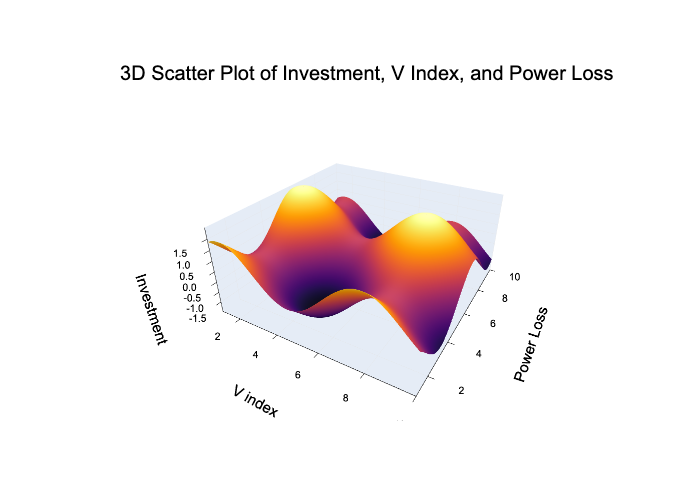

In [34]:
x = 1:0.1:10
y = 1:0.1:10
z = [cos(x)+sin(y) for x in x, y in y]

plot(
    x, y, z,
    st = :surface,
    marker_z = z,
    xlabel = "V index",
    ylabel = "Power Loss",
    zlabel = "Investment",
    title = "3D Scatter Plot of Investment, V Index, and Power Loss",
    legend = false
)

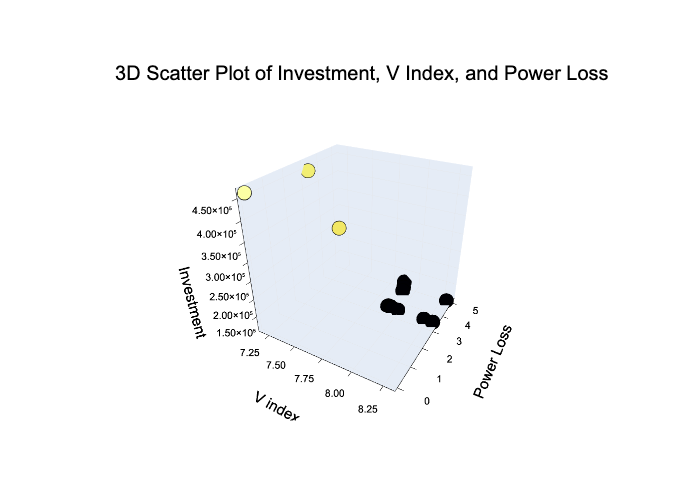

In [31]:
plotlyjs()
plot(
    obj_V, obj_Ploss, obj_inv,
    st = :scatter,
    marker_z = obj_inv,
    xlabel = "V index",
    ylabel = "Power Loss",
    zlabel = "Investment",
    title = "3D Scatter Plot of Investment, V Index, and Power Loss",
    legend = false
)

In [21]:
using GeometryBasics

In [30]:
surface(alpha, beta, obj_inv)

In [7]:
Pkg.add("GeometryBasics")
using GeometryBasics

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [8]:


# Extract columns from your DataFrame
x = results.obj_investment
y = results.obj_V_index
z = results.obj_Power_loss

# Create a triangulated surface using scatter points
scatter3d = plot(x, y, z, st = :scatter, legend = false)  # Add scatter points
tri = trisurf(x, y, z, xlabel = "Investment", ylabel = "V Index", zlabel = "Power Loss", title = "Triangulated 3D Surface")

plot(scatter3d, tri)

UndefVarError: UndefVarError: `trisurf` not defined

In [25]:
alpha

64-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.6
 0.7
 0.7
 0.7
 0.7
 0.8
 0.8
 0.9
 1.0

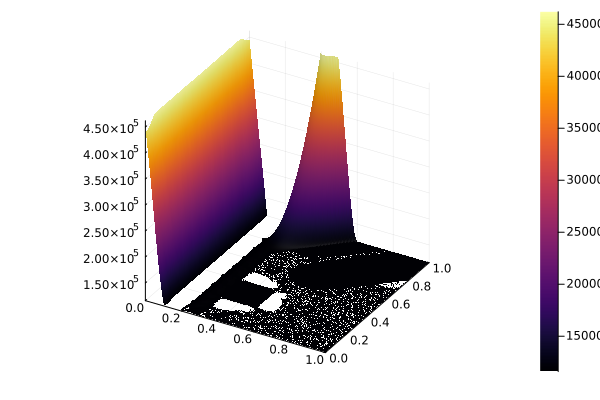

In [24]:
surface(alpha, beta, obj_inv)

In [12]:
length(obj_Ploss)

15

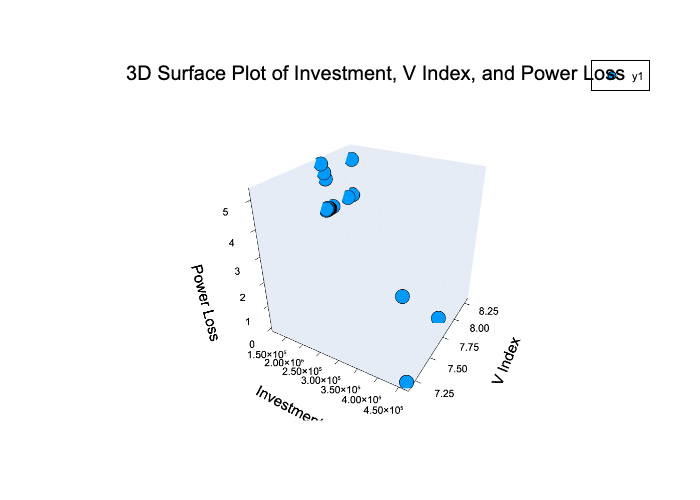

In [29]:
# Extract the columns of interest
x = results.obj_investment
y = results.obj_V_index
z = results.obj_Power_loss

# Create the surface plot
plotlyjs()
plot(
    x, y, z,
    st = :scatter,
    xlabel = "Investment",
    ylabel = "V Index",
    zlabel = "Power Loss",
    title = "3D Surface Plot of Investment, V Index, and Power Loss"
)

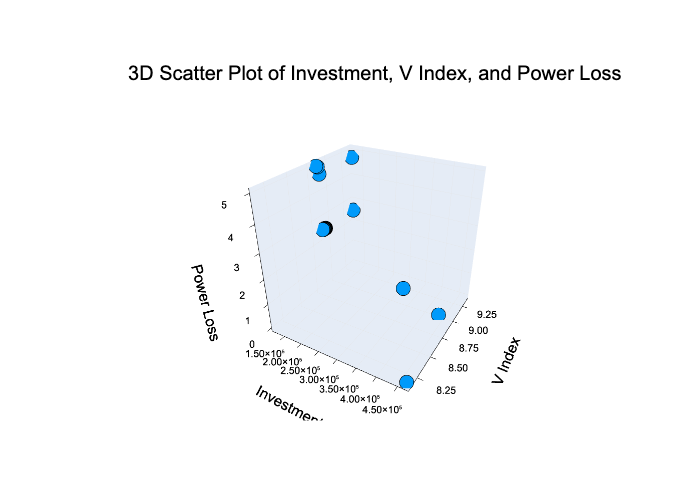

In [30]:
plot(
    x, y, z,
    st = :scatter,
    xlabel = "Investment",
    ylabel = "V Index",
    zlabel = "Power Loss",
    title = "3D Scatter Plot of Investment, V Index, and Power Loss",
    legend = false
)

In [16]:
x = 0:0.1:10
y = 0:0.1:10
f(x,y) = sin(x)+cos(y)
F = [f(x,y) for x in x, y in y]

101×101 Matrix{Float64}:
 1.0       0.995004  0.980067  0.955336  …  -0.930426  -0.889191  -0.839072
 1.09983   1.09484   1.0799    1.05517      -0.830593  -0.789358  -0.739238
 1.19867   1.19367   1.17874   1.15401      -0.731757  -0.690522  -0.640402
 1.29552   1.29052   1.27559   1.25086      -0.634906  -0.593671  -0.543551
 1.38942   1.38442   1.36948   1.34475      -0.541008  -0.499773  -0.449653
 1.47943   1.47443   1.45949   1.43476   …  -0.451001  -0.409766  -0.359646
 1.56464   1.55965   1.54471   1.51998      -0.365784  -0.324549  -0.274429
 1.64422   1.63922   1.62428   1.59955      -0.286209  -0.244973  -0.194854
 1.71736   1.71236   1.69742   1.67269      -0.21307   -0.171835  -0.121715
 1.78333   1.77833   1.76339   1.73866      -0.147099  -0.105864  -0.0557446
 ⋮                                       ⋱                         ⋮
 1.22289   1.21789   1.20296   1.17823      -0.707536  -0.666301  -0.616182
 1.12445   1.11946   1.10452   1.07979      -0.805972  -0.764737  -0.

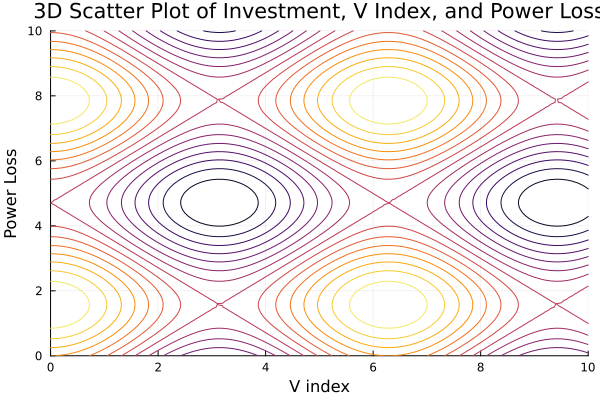

In [20]:
plot(
    x, y, F,
    st = :scatter,
    marker_z = F,
    xlabel = "V index",
    ylabel = "Power Loss",
    zlabel = "Investment",
    title = "3D Scatter Plot of Investment, V Index, and Power Loss",
    legend = false
)

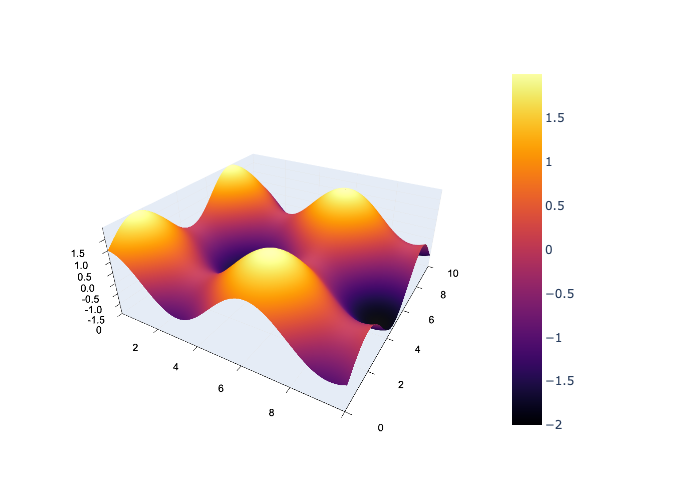

In [27]:
surface(x,y,F)